<b>Prediction of Disease Outbreaks</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_heart = pd.read_csv("data\heart.csv")
df_diabetes = pd.read_csv("data\diabetes.csv.csv")
df_parkinsons = pd.read_csv("data\parkinsons.csv")

<b>Heart Disease Dataset ↓</b>

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Null/Missing Values in the Heart Disease Dataset

In [5]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

No Need to do encoding as no categorical features present

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df_heart.shape

(303, 14)

<Axes: >

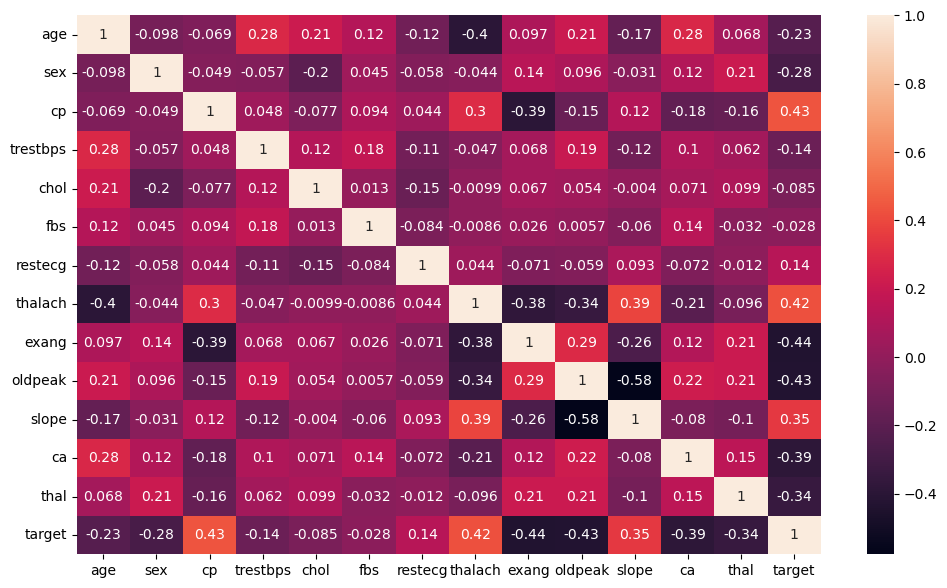

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df_heart.corr(),annot=True)

Heatmap showing correlation between every feature

In [10]:
X_heart = df_heart.drop("target",axis=1)
y_heart = df_heart["target"]

Separating Dependent and Independent Features

In [11]:
X_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Independent Features

In [12]:
y_heart

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Dependent Feature

In [13]:
y_heart.value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 -> Heart Disease

0 -> No Heart Disease

In [14]:
from sklearn.model_selection import train_test_split
X_heart_train,X_heart_test,y_heart_train,y_heart_test = train_test_split(X_heart,y_heart,test_size=0.2,stratify=y_heart,random_state=42)

Data splitted between Training and Test

In [15]:
print(X_heart_train.shape,X_heart_test.shape,y_heart_train.shape,y_heart_test.shape)

(242, 13) (61, 13) (242,) (61,)


<b>Diabetes Dataset ↓</b>

In [16]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null/Missing Values in the Heart Disease Dataset

In [18]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df_diabetes.shape

(768, 9)

<Axes: >

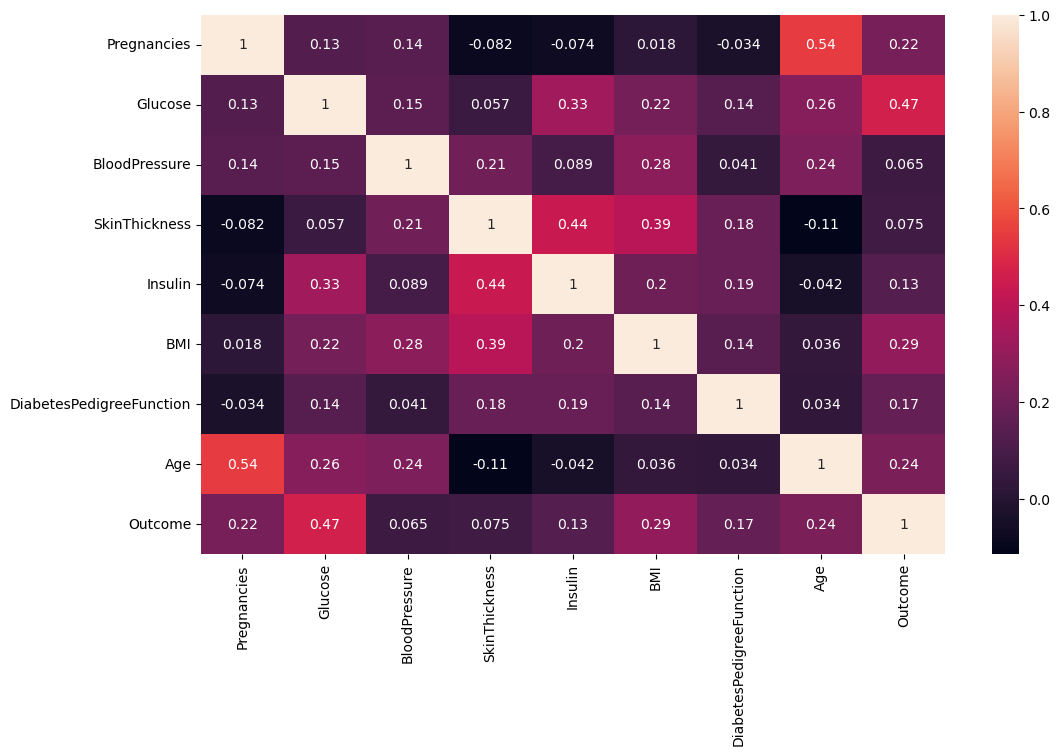

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df_diabetes.corr(),annot=True)

Heatmap showing correlation between every feature

In [22]:
X_diabetes = df_diabetes.drop("Outcome",axis=1)
y_diabetes = df_diabetes["Outcome"]

Separating Dependent and Independent Features

In [23]:
X_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Independent Features

In [24]:
y_diabetes

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Dependent Feature

In [25]:
y_diabetes.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<p1>0 -> Not Diabetic

1 -> Diabetic</p1>

In [26]:
from sklearn.model_selection import train_test_split
X_diabetes_train,X_diabetes_test,y_diabetes_train,y_diabetes_test = train_test_split(X_diabetes,y_diabetes,test_size=0.2,stratify=y_diabetes,random_state=42)

Splitting the dataset into Training and Test

In [27]:
print(X_diabetes_train.shape,X_diabetes_test.shape,y_diabetes_train.shape,y_diabetes_test.shape)

(614, 8) (154, 8) (614,) (154,)


<b>Parkinsons Disease Dataset ↓</b>

In [28]:
df_parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [29]:
df_parkinsons.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No Null/Missing Values in the Heart Disease Dataset

In [30]:
df_parkinsons.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Only 1 non-numeric feature(name) which can be dropped, so no need to do encoding

In [31]:
df_parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [32]:
df_parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [33]:
df_parkinsons.shape

(195, 24)

In [34]:
df_parkinsons['name'].value_counts()

name
phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: count, Length: 195, dtype: int64

Name Column will not help us in our prediction, so we can drop it before separating independent and dependent features

In [35]:
df_parkinsons.drop(columns='name',inplace=True)

<Axes: >

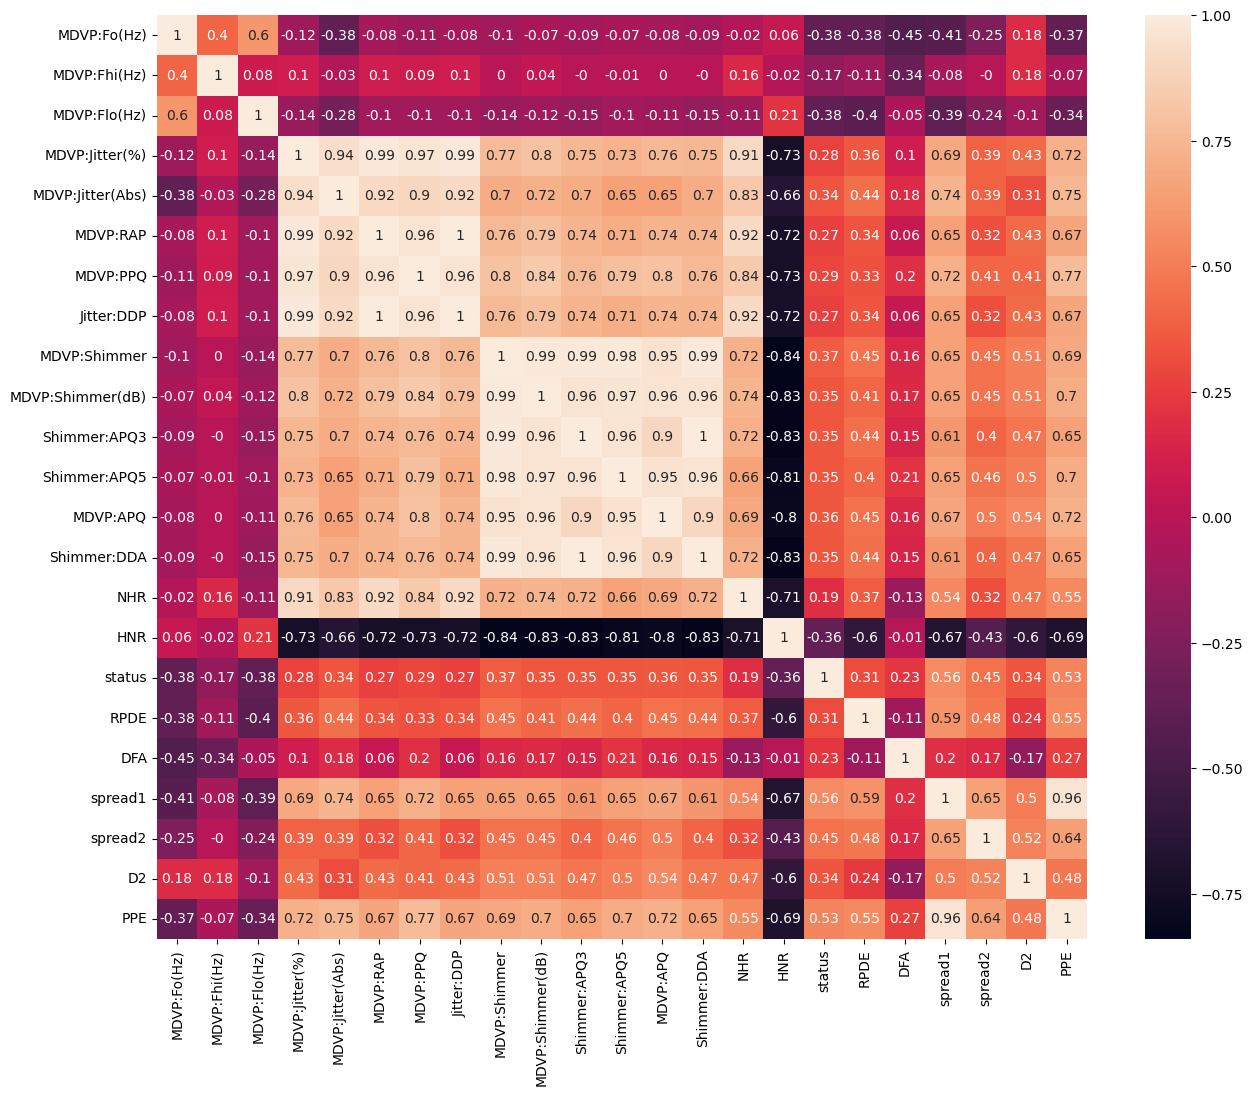

In [36]:
plt.figure(figsize=(15,12))
corre = df_parkinsons.corr()
sns.heatmap(corre.round(2),annot=True)

Heatmap showing correlation between every feature

In [37]:
X_parkinsons = df_parkinsons.drop("status",axis=1)
y_parkinsons = df_parkinsons["status"]

Separating Independent and Dependent Features

In [38]:
X_parkinsons.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Independent Features

In [39]:
y_parkinsons

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Dependent Feature

In [40]:
y_parkinsons.value_counts()

status
1    147
0     48
Name: count, dtype: int64

<p1>1 -> Parkinsons Disease

0 -> Not Parkinsons Disease</p1>

In [41]:
X_parkinsons_train,X_parkinsons_test,y_parkinsons_train,y_parkinsons_test = train_test_split(X_parkinsons,y_parkinsons,test_size=0.2,stratify=y_parkinsons,random_state=42)

Splitting the data into Training and Test Sets

In [42]:
print(X_parkinsons_train.shape,X_parkinsons_test.shape,y_parkinsons_train.shape,y_parkinsons_test.shape)

(156, 22) (39, 22) (156,) (39,)


<b>Model Training for Heart Disease Dataset ↓</b>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
models = {
    "svm":svm.SVC(),
    "lr": LogisticRegression(),
    "nb":GaussianNB(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier()

}

In [45]:
print("Accuracy Score of all the models for Heart Disease Dataset")
from sklearn.metrics import accuracy_score
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_heart_train, y_heart_train)
    y_heart_train_pred = model.predict(X_heart_train)
    y_heart_test_pred = model.predict(X_heart_test)
    model_train_accuracy = accuracy_score(y_heart_train, y_heart_train_pred) 
    model_test_accuracy = accuracy_score(y_heart_test, y_heart_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print(f"Accuracy:",round(model_train_accuracy,4))
    print('Model performance for Test set')
    print(f"Accuracy:",round(model_test_accuracy,4))

Accuracy Score of all the models for Heart Disease Dataset
svm
Model performance for Training set
Accuracy: 0.6529
Model performance for Test set
Accuracy: 0.6557
lr
Model performance for Training set
Accuracy: 0.8388
Model performance for Test set
Accuracy: 0.8033
nb
Model performance for Training set
Accuracy: 0.843
Model performance for Test set
Accuracy: 0.8197
dt
Model performance for Training set
Accuracy: 1.0
Model performance for Test set
Accuracy: 0.7213
rf
Model performance for Training set
Accuracy: 1.0
Model performance for Test set
Accuracy: 0.7869


As we can see, Logistic Regression,Naive Bayes and Random Forest perform better, Decision Tree Classifier is Overfitting

In [46]:
from sklearn.model_selection import RandomizedSearchCV
lr_params = {"penalty":['l1', 'l2', 'elasticnet', 'None'],
        "C" : [0.01,0.1,1,10,100],         
        "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']         
}
random = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=lr_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_heart_train, y_heart_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

In [82]:
lr_best = LogisticRegression(solver='liblinear',penalty='l2',C = 0.1)
lr_best.fit(X_heart_train,y_heart_train)
y_heart_train_pred = lr_best.predict(X_heart_train)
y_heart_test_pred = lr_best.predict(X_heart_test)
model_train_accuracy = accuracy_score(y_heart_train, y_heart_train_pred) 
model_test_accuracy = accuracy_score(y_heart_test, y_heart_test_pred)
print('Logistic Regression Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Logistic Regression Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Logistic Regression Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.8512
Logistic Regression Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.7705


In [48]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_heart_train, y_heart_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 500,
 'min_samples_split': 20,
 'max_features': 7,
 'max_depth': 15}

In [49]:
rf_best = RandomForestClassifier(n_estimators=1000,min_samples_split=20,max_features=5,max_depth=None)
rf_best.fit(X_heart_train,y_heart_train)
y_heart_train_pred = rf_best.predict(X_heart_train)
y_heart_test_pred = rf_best.predict(X_heart_test)
model_train_accuracy = accuracy_score(y_heart_train, y_heart_train_pred) 
model_test_accuracy = accuracy_score(y_heart_test, y_heart_test_pred)
print('Random Forest Model performance for Training set of Heart Disease Dataset after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Random Forest Model performance for Test set of Heart Disease Dataset after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Random Forest Model performance for Training set of Heart Disease Dataset after Hyperparameter Tuning
Accuracy: 0.9008
Random Forest Model performance for Test set of Heart Disease Dataset after Hyperparameter Tuning
Accuracy: 0.8361


In [50]:
from sklearn.model_selection import GridSearchCV
svm_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}
grid=GridSearchCV(svm.SVC(),param_grid=svm_params,refit=True,cv=5,verbose=3)
grid.fit(X_heart_train,y_heart_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.551 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.551 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.542 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.551 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.551 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.542 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.551 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

{'C': 100, 'gamma': 0.0001}

In [101]:
svm_best = svm.SVC(C=100,gamma=0.0001,kernel='linear')
svm_best.fit(X_heart_train,y_heart_train)
y_heart_train_pred = svm_best.predict(X_heart_train)
y_heart_test_pred = svm_best.predict(X_heart_test)
model_train_accuracy = accuracy_score(y_heart_train, y_heart_train_pred) 
model_test_accuracy = accuracy_score(y_heart_test, y_heart_test_pred)
print('SVM Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('SVM Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

SVM Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.8636
SVM Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.8197


After Hyperparameter Tuning we can see SVM performs best

In [102]:
import pickle
filename = 'heart_model.sav'
pickle.dump(svm_best, open(filename, 'wb'))

<b>Model Training for Diabetes Dataset ↓</b>

In [52]:
print("Accuracy Score of all the models for Diabetes Dataset")
from sklearn.metrics import accuracy_score
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_diabetes_train, y_diabetes_train)
    y_diabetes_train_pred = model.predict(X_diabetes_train)
    y_diabetes_test_pred = model.predict(X_diabetes_test)
    model_train_accuracy = accuracy_score(y_diabetes_train, y_diabetes_train_pred) 
    model_test_accuracy = accuracy_score(y_diabetes_test, y_diabetes_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set of Diabetes Dataset')
    print(f"Accuracy:",round(model_train_accuracy,4))
    print('Model performance for Test set of Diabetes Dataset')
    print(f"Accuracy:",round(model_test_accuracy,4))

Accuracy Score of all the models for Diabetes Dataset
svm
Model performance for Training set of Diabetes Dataset
Accuracy: 0.7785
Model performance for Test set of Diabetes Dataset
Accuracy: 0.7208
lr
Model performance for Training set of Diabetes Dataset
Accuracy: 0.7948
Model performance for Test set of Diabetes Dataset
Accuracy: 0.7143
nb
Model performance for Training set of Diabetes Dataset
Accuracy: 0.7736
Model performance for Test set of Diabetes Dataset
Accuracy: 0.7078
dt
Model performance for Training set of Diabetes Dataset
Accuracy: 1.0
Model performance for Test set of Diabetes Dataset
Accuracy: 0.7208
rf
Model performance for Training set of Diabetes Dataset
Accuracy: 1.0
Model performance for Test set of Diabetes Dataset
Accuracy: 0.7338


Among these, SVM ,Logistic Regression and Random Forest are performing the best, so lets Hyperparameter Tune them

In [53]:
from sklearn.model_selection import GridSearchCV
svm_params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [100,10,1, 0.1, 0.01, 0.001, 0.0001]}
grid=GridSearchCV(svm.SVC(),param_grid=svm_params,refit=True,cv=5,verbose=3)
grid.fit(X_diabetes_train,y_diabetes_train)
grid.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .................C=0.01, gamma=100;, score=0.650 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=100;, score=0.650 total time=   0.0s
[CV 3/5] END .................C=0.01, gamma=100;, score=0.650 total time=   0.0s
[CV 4/5] END .................C=0.01, gamma=100;, score=0.650 total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=100;, score=0.656 total time=   0.0s
[CV 1/5] END ..................C=0.01, gamma=10;, score=0.650 total time=   0.0s
[CV 2/5] END ..................C=0.01, gamma=10;, score=0.650 total time=   0.0s
[CV 3/5] END ..................C=0.01, gamma=10;, score=0.650 total time=   0.0s
[CV 4/5] END ..................C=0.01, gamma=10;, score=0.650 total time=   0.0s
[CV 5/5] END ..................C=0.01, gamma=10;, score=0.656 total time=   0.0s
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.650 total time=   0.0s
[CV 2/5] END ...................C=0.01, gamma=1

{'C': 1, 'gamma': 0.0001}

In [104]:
svm_best = svm.SVC(C=1,gamma=0.0001,kernel='poly',degree=2)
svm_best.fit(X_diabetes_train,y_diabetes_train)
y_diabetes_train_pred = svm_best.predict(X_diabetes_train)
y_diabetes_test_pred = svm_best.predict(X_diabetes_test)
model_train_accuracy = accuracy_score(y_diabetes_train, y_diabetes_train_pred) 
model_test_accuracy = accuracy_score(y_diabetes_test, y_diabetes_test_pred)
print('SVM Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('SVM Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

SVM Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.7883
SVM Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.7403


In [105]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(svm_best, open(filename, 'wb'))

In [55]:
random = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=lr_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_diabetes_train, y_diabetes_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [103]:
lr_best = LogisticRegression(solver='newton-cg',penalty='l2',C=0.01)
lr_best.fit(X_diabetes_train,y_diabetes_train)
y_diabetes_train_pred = lr_best.predict(X_diabetes_train)
y_diabetes_test_pred = lr_best.predict(X_diabetes_test)
model_train_accuracy = accuracy_score(y_diabetes_train, y_diabetes_train_pred) 
model_test_accuracy = accuracy_score(y_diabetes_test, y_diabetes_test_pred)
print('Logistic Regression Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Logistic Regression Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Logistic Regression Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.7866
Logistic Regression Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.7208


In [57]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_diabetes_train, y_diabetes_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 15,
 'max_features': 7,
 'max_depth': 15}

In [81]:
rf_best = RandomForestClassifier(n_estimators=200,min_samples_split=15,max_features=7,max_depth=15)
rf_best.fit(X_diabetes_train,y_diabetes_train)
y_diabetes_train_pred = rf_best.predict(X_diabetes_train)
y_diabetes_test_pred = rf_best.predict(X_diabetes_test)
model_train_accuracy = accuracy_score(y_diabetes_train, y_diabetes_train_pred) 
model_test_accuracy = accuracy_score(y_diabetes_test, y_diabetes_test_pred)
print('Random Forest Model performance for Training set of Diabetes Dataset after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Random Forest Model performance for Test set of Diabetes Dataset after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Random Forest Model performance for Training set of Diabetes Dataset after Hyperparameter Tuning
Accuracy: 0.9283
Random Forest Model performance for Test set of Diabetes Dataset after Hyperparameter Tuning
Accuracy: 0.7727


So we can see that SVM is a better model for Diabetes Dataset as we can use different kernel to further Hyperparameter tune it, Random Forest is overfitting

<b>Model Training for Parkinsons Disease Dataset ↓</b>

In [59]:
print("Accuracy Score of all the models for Parkinsons Disease Dataset")
from sklearn.metrics import accuracy_score
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_parkinsons_train, y_parkinsons_train)
    y_parkinsons_train_pred = model.predict(X_parkinsons_train)
    y_parkinsons_test_pred = model.predict(X_parkinsons_test)
    model_train_accuracy = accuracy_score(y_parkinsons_train, y_parkinsons_train_pred) 
    model_test_accuracy = accuracy_score(y_parkinsons_test, y_parkinsons_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print(f"Accuracy:",round(model_train_accuracy,4))
    print('Model performance for Test set')
    print(f"Accuracy:",round(model_test_accuracy,4))

Accuracy Score of all the models for Parkinsons Disease Dataset
svm
Model performance for Training set
Accuracy: 0.8077
Model performance for Test set
Accuracy: 0.8718
lr
Model performance for Training set
Accuracy: 0.8526
Model performance for Test set
Accuracy: 0.8718
nb
Model performance for Training set
Accuracy: 0.7179
Model performance for Test set
Accuracy: 0.6667
dt
Model performance for Training set
Accuracy: 1.0
Model performance for Test set
Accuracy: 0.8462
rf
Model performance for Training set
Accuracy: 1.0
Model performance for Test set
Accuracy: 0.9231


Random Forest, SVM and Logistic Regression are performing good here, so lets Hyperparameter tune them

In [60]:
from sklearn.model_selection import GridSearchCV
svm_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}
grid=GridSearchCV(svm.SVC(),param_grid=svm_params,refit=True,cv=5,verbose=3)
grid.fit(X_parkinsons_train,y_parkinsons_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.774 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.774 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.774 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.774 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.750 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

{'C': 1, 'gamma': 0.001}

In [90]:
svm_best = svm.SVC(C=1,gamma=0.001,)
svm_best.fit(X_parkinsons_train,y_parkinsons_train)
y_parkinsons_train_pred = svm_best.predict(X_parkinsons_train)
y_parkinsons_test_pred = svm_best.predict(X_parkinsons_test)
model_train_accuracy = accuracy_score(y_parkinsons_train, y_parkinsons_train_pred) 
model_test_accuracy = accuracy_score(y_parkinsons_test, y_parkinsons_test_pred)
print('SVM Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('SVM Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

SVM Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.8782
SVM Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.8205


In [62]:
random = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=lr_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_parkinsons_train, y_parkinsons_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [63]:
lr_best = LogisticRegression(solver='liblinear',penalty='l2',C=1)
lr_best.fit(X_parkinsons_train,y_parkinsons_train)
y_parkinsons_train_pred = lr_best.predict(X_parkinsons_train)
y_parkinsons_test_pred = lr_best.predict(X_parkinsons_test)
model_train_accuracy = accuracy_score(y_parkinsons_train, y_parkinsons_train_pred) 
model_test_accuracy = accuracy_score(y_parkinsons_test, y_parkinsons_test_pred)
print('Logistic Regression Model performance for Training set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Logistic Regression Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Logistic Regression Model performance for Training set after Hyperparameter Tuning
Accuracy: 0.8526
Logistic Regression Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.8718


In [64]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_parkinsons_train, y_parkinsons_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 5,
 'max_depth': None}

In [106]:
rf_best = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=5,max_depth=None)
rf_best.fit(X_parkinsons_train,y_parkinsons_train)
y_parkinsons_train_pred = rf_best.predict(X_parkinsons_train)
y_parkinsons_test_pred = rf_best.predict(X_parkinsons_test)
model_train_accuracy = accuracy_score(y_parkinsons_train, y_parkinsons_train_pred) 
model_test_accuracy = accuracy_score(y_parkinsons_test, y_parkinsons_test_pred)
print('Random Forest Model performance for Training set of Parkinsons Disease after Hyperparameter Tuning')
print(f"Accuracy:",round(model_train_accuracy,4))
print('Random Forest Model performance for Test set after Hyperparameter Tuning')
print(f"Accuracy:",round(model_test_accuracy,4))

Random Forest Model performance for Training set of Parkinsons Disease after Hyperparameter Tuning
Accuracy: 1.0
Random Forest Model performance for Test set after Hyperparameter Tuning
Accuracy: 0.9487


As we can see, Random Forest is the best model for Parkinsons Disease Dataset

In [107]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(rf_best, open(filename, 'wb'))